In [1]:
# Requirements
# python = 3.6.2
# pynwb = 1.0.1

In [2]:
#################################
# Creating and Writing NWB files
#################################

# Packages
import numpy
import pynwb
from pynwb import NWBFile, TimeSeries, get_manager
from pynwb.spec import NWBGroupSpec, NWBDatasetSpec, NWBNamespace
from pynwb.base import ProcessingModule
from pynwb.ecephys import ElectrodeGroup, Device
from pynwb.image import ImageSeries
from pynwb.core import set_parents
from pynwb import *
from datetime import datetime
from pynwb import NWBFile #, TimeSeries, get_manager

In [3]:
# Write an NWBFile

session_description='session description', 
identifier='identifier'
session_start_time = datetime.now()

nwbfile2 = NWBFile('session_description', 
                   'identifier', 
                   session_start_time, 
                   file_create_date=None, 
                   timestamps_reference_time=None,
                   experimenter="Experimenter", 
                   experiment_description="Experimenter dsecription", 
                   session_id="session id", 
                   institution=None, 
                   keywords=None, 
                   notes=None, 
                   pharmacology=None, 
                   protocol=None, 
                   related_publications=None, 
                   slices=None, 
                   source_script=None, 
                   source_script_file_name=None, 
                   data_collection=None, 
                   surgery=None, 
                   virus=None, 
                   stimulus_notes=None, 
                   lab="Laboratory", 
                   acquisition=None, 
                   stimulus=None, 
                   stimulus_template=None, 
                   epochs=None, 
                   epoch_tags=set(), 
                   trials=None, 
                   invalid_times=None, 
                   time_intervals=None,
                   units=None, 
                   modules=None, 
                   electrodes=None, 
                   electrode_groups=None, 
                   ic_electrodes=None, 
                   sweep_table=None, 
                   imaging_planes=None, 
                   ogen_sites=None, 
                   devices=None, 
                   subject=None)

print("nwbfile2 = ", nwbfile2)

nwbfile2 =  
root <class 'pynwb.file.NWBFile'>
Fields:
  acquisition: { }
  analysis: { }
  devices: { }
  electrode_groups: { }
  epoch_tags: {}
  experiment_description: Experimenter dsecription
  experimenter: Experimenter
  ic_electrodes: { }
  imaging_planes: { }
  lab: Laboratory
  lab_meta_data: { }
  modules: { }
  ogen_sites: { }
  session_id: session id
  stimulus: { }
  stimulus_template: { }
  time_intervals: { }



/home/elodie/miniconda2/envs/env_NWB_py3/lib/python3.6/site-packages/pynwb/file.py:615: UserWarning: Date is missing timezone information. Updating to local timezone.
  warn("Date is missing timezone information. Updating to local timezone.")


In [4]:
# pyNWB
import datetime
from pynwb import TimeSeries, NWBFile
import numpy as np

# File
nwbfile2 = NWBFile(identifier='identifier', session_start_time=datetime.datetime.now(), session_description='description')

In [5]:
######################
# Electrode metadata
######################
# Extracellular electrophysiology data
#######################################

device = nwbfile2.create_device(name='trodes_rig123')
print("device = ", device)

electrode_name = 'tetrode1'
description = "an example tetrode"
location = "somewhere in the hippocampus"

# Electrode group
electrode_group = nwbfile2.create_electrode_group(electrode_name,
                                                 description=description,
                                                 location=location,
                                                 device=device)
print("electrode_group = ", electrode_group)

for idx in [1, 2, 3, 4]:
    nwbfile2.add_electrode(idx,
                          x=1.0, y=2.0, z=3.0,
                          imp=float(-idx),
                          location='CA1', filtering='none',
                          group=electrode_group)

# Electrode table region
electrode_table_region = nwbfile2.create_electrode_table_region([0, 2], 'the first and third electrodes')
print("electrode_table_region = ", electrode_table_region)

device =  
trodes_rig123 <class 'pynwb.device.Device'>
Fields:

electrode_group =  
tetrode1 <class 'pynwb.ecephys.ElectrodeGroup'>
Fields:
  description: an example tetrode
  device: trodes_rig123 <class 'pynwb.device.Device'>
  location: somewhere in the hippocampus

electrode_table_region =  
electrodes <class 'pynwb.core.DynamicTableRegion'>
Fields:
  description: the first and third electrodes
  table: electrodes <class 'pynwb.core.DynamicTable'>



In [6]:
# Creating TimeSeries
from pynwb.ecephys import ElectricalSeries
from pynwb.ecephys import SpikeEventSeries
from pynwb.behavior import SpatialSeries

###################
# ElectricalSeries
###################

data_len = 10 # 1000
print("data_len = ", data_len)
    
ephys_data = np.random.rand(data_len) # In def  ElectricalSeries
print("ephys_data = ", ephys_data)

rate = 20.0
print("rate = ", rate)
timestamps = np.arange(10)
print("np.arange(data_len) = ", np.arange(data_len))
ephys_timestamps = np.arange(data_len) / rate    # In def  ElectricalSeries
print("ephys_timestamps = ", ephys_timestamps)
print("   ")

# For writing continuous data, use the NWB ElectricalSeries
ephys_ts = ElectricalSeries(
                            name = 'test_ephys_data',
                            data = ephys_data,
                            electrodes = electrode_table_region,
                            #timestamps=None,
                            #timestamps=timestamps,    
                            rate=rate, # (or timestamps not both)
                           )
print("ephys_ts = ", ephys_ts)
nwbfile2.add_acquisition(ephys_ts) 

data_len =  10
ephys_data =  [0.32645827 0.96708563 0.71051873 0.1697103  0.24112845 0.28576582
 0.5996742  0.0358231  0.24211248 0.13315512]
rate =  20.0
np.arange(data_len) =  [0 1 2 3 4 5 6 7 8 9]
ephys_timestamps =  [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]
   
ephys_ts =  
test_ephys_data <class 'pynwb.ecephys.ElectricalSeries'>
Fields:
  comments: no comments
  conversion: 1.0
  data: [0.32645827 0.96708563 0.71051873 0.1697103  0.24112845 0.28576582
 0.5996742  0.0358231  0.24211248 0.13315512]
  description: no description
  electrodes: electrodes <class 'pynwb.core.DynamicTableRegion'>
  num_samples: 10
  rate: 20.0
  resolution: 0.0
  starting_time: 0.0
  unit: volt



In [7]:
# Filename
filename = "/home/elodie/NWB_Files/NWB_File_python_3_pynwb_101_ephys_data.nwb"
io2 = NWBHDF5IO(filename, manager=get_manager(), mode='w')

In [8]:
io2.write(nwbfile2)
io2.close()

In [9]:
#################################
# Read NWB File
#################################

io2 = pynwb.NWBHDF5IO(filename, mode='r') # My own NWB File
io2.read_builder()

{'acquisition': {'test_ephys_data': {'data': {'attributes': {'conversion': 1.0,
     'resolution': 0.0,
     'unit': 'volt'},
    'data': <HDF5 dataset "data": shape (10,), type "<f8">},
   'electrodes': {'attributes': {'description': 'the first and third electrodes',
     'help': 'a subset (i.e. slice or region) of a DynamicTable',
     'namespace': 'core',
     'neurodata_type': 'DynamicTableRegion',
     'table': {'filtering': {'attributes': {'description': 'description of hardware filtering',
        'help': 'Values for a list of elements',
        'namespace': 'core',
        'neurodata_type': 'VectorData'},
       'data': array(['none', 'none', 'none', 'none'], dtype=object)},
      'group': {'attributes': {'description': 'a reference to the ElectrodeGroup this electrode is a part of',
        'help': 'Values for a list of elements',
        'namespace': 'core',
        'neurodata_type': 'VectorData'},
       'data': <hdmf.backends.hdf5.h5_utils.H5ReferenceDataset at 0x7f792224b2

In [10]:
# Acquisition
container = io2.read()
print("container = ", container)
print(" ------  ")

raw_ts = container.acquisition
print ('raw_ts "container.acquisition" = ', raw_ts) # SpikeEventSeries(NWBContainer)
                                 # timeseries(NWBContainer) base.py
print(" ------  ")   

container_analysis = container.analysis
print("container.analysis = ", container.analysis)
print(" ------  ")

container_experiment_description = container.experiment_description
print("container_experiment_description = ", container_experiment_description)
print(" ------  ")

container =  
root <class 'pynwb.file.NWBFile'>
Fields:
  acquisition: { test_ephys_data <class 'pynwb.ecephys.ElectricalSeries'> }
  analysis: { }
  devices: { trodes_rig123 <class 'pynwb.device.Device'> }
  electrode_groups: { tetrode1 <class 'pynwb.ecephys.ElectrodeGroup'> }
  electrodes: electrodes <class 'pynwb.core.DynamicTable'>
  epoch_tags: {}
  ic_electrodes: { }
  imaging_planes: { }
  lab_meta_data: { }
  modules: { }
  ogen_sites: { }
  stimulus: { }
  stimulus_template: { }
  time_intervals: { }

 ------  
raw_ts "container.acquisition" =  {'test_ephys_data': 
test_ephys_data <class 'pynwb.ecephys.ElectricalSeries'>
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (10,), type "<f8">
  description: no description
  electrodes: electrodes <class 'pynwb.core.DynamicTableRegion'>
  num_samples: 10
  rate: 20.0
  resolution: 0.0
  starting_time: 0.0
  starting_time_unit: Seconds
  unit: volt
}
 ------  
container.analysis =  {}
 ------  
co

In [11]:
print("raw_ts = ", raw_ts)
print("   ")

for v in raw_ts :
    #print("raw_ts = ", raw_ts)
    print("v = ", v)

raw_ts =  {'test_ephys_data': 
test_ephys_data <class 'pynwb.ecephys.ElectricalSeries'>
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (10,), type "<f8">
  description: no description
  electrodes: electrodes <class 'pynwb.core.DynamicTableRegion'>
  num_samples: 10
  rate: 20.0
  resolution: 0.0
  starting_time: 0.0
  starting_time_unit: Seconds
  unit: volt
}
   
v =  test_ephys_data


In [12]:
container = io2.read()
print("container.ec_electrodes = ", container.ec_electrodes)

container.ec_electrodes =  
electrodes <class 'pynwb.core.DynamicTable'>
Fields:
  colnames: ('x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name')
  columns: [
x <class 'pynwb.core.VectorData'>
Fields:
  description: the x coordinate of the channel location
, 
y <class 'pynwb.core.VectorData'>
Fields:
  description: the y coordinate of the channel location
, 
z <class 'pynwb.core.VectorData'>
Fields:
  description: the z coordinate of the channel location
, 
imp <class 'pynwb.core.VectorData'>
Fields:
  description: the impedance of the channel
, 
location <class 'pynwb.core.VectorData'>
Fields:
  description: the location of channel within the subject e.g. brain region
, 
filtering <class 'pynwb.core.VectorData'>
Fields:
  description: description of hardware filtering
, 
group <class 'pynwb.core.VectorData'>
Fields:
  description: a reference to the ElectrodeGroup this electrode is a part of
, 
group_name <class 'pynwb.core.VectorData'>
Fields:
  description: the nam

In [13]:
# Plotting settings
show_bar_plot = False    # Change setting to plot distribution of object sizes in the HDF5 file
plot_single_file = True # Plot all files or a single example file

from utils.render import HierarchyDescription, NXGraphHierarchyDescription
import matplotlib.pyplot as plt
       
# Create the plots for all files
file_hierarchy = HierarchyDescription.from_hdf5(filename)
file_graph = NXGraphHierarchyDescription(file_hierarchy)
fig = file_graph.draw(show_plot=False,
                      figsize=(12,16),
                      label_offset=(0.0, 0.0065),
                      label_font_size=10)
print("fig = ", fig)
plot_title = filename + " \n " + "#Datasets=%i, #Attributes=%i, #Groups=%i, #Links=%i" % (len(file_hierarchy['datasets']), len(file_hierarchy['attributes']), len(file_hierarchy['groups']), len(file_hierarchy['links']))
plt.title(plot_title)
plt.show()

fig =  Figure(1200x1600)


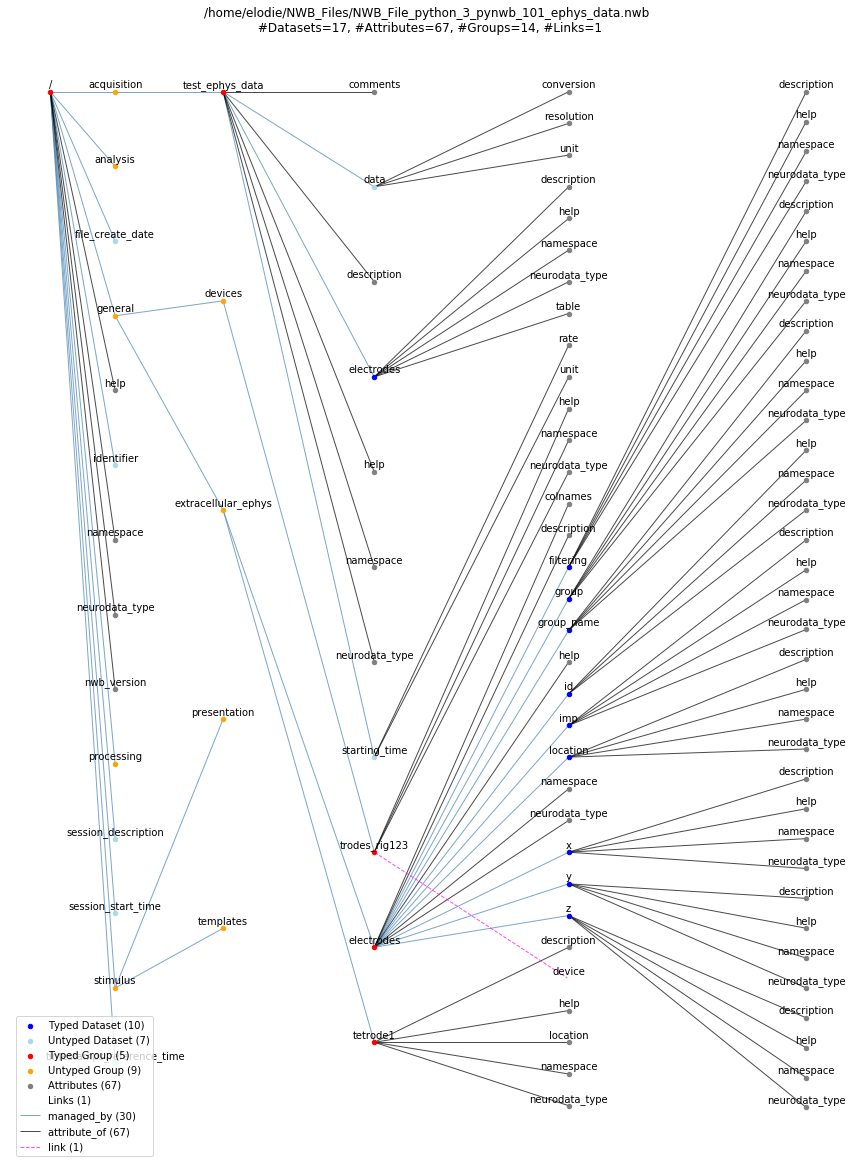

In [14]:
fig = file_graph.draw(
                      show_plot=False,
                      figsize=(12,16),
                      label_offset=(0.0, 0.0065),
                      label_font_size=10
                     )

plot_title = filename + " \n " + "#Datasets=%i, #Attributes=%i, #Groups=%i, #Links=%i" % (len(file_hierarchy['datasets']), len(file_hierarchy['attributes']), len(file_hierarchy['groups']), len(file_hierarchy['links']))
plt.title(plot_title)
plt.show()

In [15]:
##print("nwbfile2.get_acquisition() = ", nwbfile2.get_acquisition())
##print("   ")
print("nwbfile2.acquisition = ", nwbfile2.acquisition)

nwbfile2.acquisition =  {'test_ephys_data': 
test_ephys_data <class 'pynwb.ecephys.ElectricalSeries'>
Fields:
  comments: no comments
  conversion: 1.0
  data: [0.32645827 0.96708563 0.71051873 0.1697103  0.24112845 0.28576582
 0.5996742  0.0358231  0.24211248 0.13315512]
  description: no description
  electrodes: electrodes <class 'pynwb.core.DynamicTableRegion'>
  num_samples: 10
  rate: 20.0
  resolution: 0.0
  starting_time: 0.0
  unit: volt
}


In [16]:
range(len(nwbfile2.acquisition))

range(0, 1)

In [17]:
for i in nwbfile2.acquisition:
    print("i = ", i)

i =  test_ephys_data


In [18]:
for i in container.acquisition:
    print("i.__nwbfields__ = ", nwbfile2.get_acquisition(i).__nwbfields__)
    print("   ")
    print("i = ", i)
    ts_name = nwbfile2.get_acquisition(i).name
    print("ts_name = ", ts_name)
    ts_num_samples = nwbfile2.get_acquisition(i).num_samples
    print("ts_num_samples = ", ts_num_samples)
    print("nwbfile2.get_acquisition(i).num_samples = ", nwbfile2.get_acquisition(i).num_samples)
    print("nwbfile2.get_acquisition(i).name = ", nwbfile2.get_acquisition(i).name)
    print("  ***   ")

i.__nwbfields__ =  ('help', 'comments', 'description', 'data', 'resolution', 'conversion', 'unit', 'num_samples', 'timestamps', 'timestamps_unit', 'interval', 'starting_time', 'rate', 'starting_time_unit', 'control', 'control_description', 'electrodes')
   
i =  test_ephys_data
ts_name =  test_ephys_data
ts_num_samples =  10
nwbfile2.get_acquisition(i).num_samples =  10
nwbfile2.get_acquisition(i).name =  test_ephys_data
  ***   
